In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import statsmodels.api as sm

# 0. Data

Source: https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data?resource=download

In [5]:
df = pd.read_csv("./engage-data.csv")

In [6]:
df.columns = [x.replace(" ", "_") for x in df.columns]

In [7]:
sorted(df.columns)

['Coverage',
 'Customer',
 'Customer_Lifetime_Value',
 'Education',
 'Effective_To_Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location_Code',
 'Marital_Status',
 'Monthly_Premium_Auto',
 'Months_Since_Last_Claim',
 'Months_Since_Policy_Inception',
 'Number_of_Open_Complaints',
 'Number_of_Policies',
 'Policy',
 'Policy_Type',
 'Renew_Offer_Type',
 'Response',
 'Sales_Channel',
 'State',
 'Total_Claim_Amount',
 'Vehicle_Class',
 'Vehicle_Size']

In [8]:
df.tail()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


# 1. Target Variable

In [9]:
df["Engaged"] = df["Response"].apply(lambda x: 1 if x == "Yes" else 0)

In [10]:
df["Engaged"].mean()

0.14320122618786948

# 2. Regression Analysis

## 2.1. With Continuous Variables

In [11]:
df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [12]:
continuous_vars = [x for x in df.dtypes[(df.dtypes == float) | (df.dtypes == int)].index if x != "Engaged"]
continuous_vars

['Customer_Lifetime_Value',
 'Income',
 'Monthly_Premium_Auto',
 'Months_Since_Last_Claim',
 'Months_Since_Policy_Inception',
 'Number_of_Open_Complaints',
 'Number_of_Policies',
 'Total_Claim_Amount']

In [13]:
logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                -0.02546
Time:                        16:24:02   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer_Lifetime_Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly_Premium_Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months_Since_Last_Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months_Since_Policy_Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number_of_Open_Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number_of_Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total_Claim_Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

## 2.2. With Categorical Variables

### 2.2.1. Categorical Variable Encoding

#### 2.2.1.1. Approach #1: Factorize

In [14]:
labels, levels = df['Education'].factorize()

In [15]:
labels

array([0, 0, 0, ..., 0, 1, 1])

In [17]:
levels

Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')

#### 2.2.1.2. Approach #2: pandas' Categorical Variable Series

In [18]:
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'],
)

In [19]:
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [20]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

#### 2.2.1.3. Approach #3: Dummy Variables

In [21]:
pd.get_dummies(df['Education']).head(10)

,Bachelor,College,Doctor,High School or Below,Master
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
5,True,False,False,False,False
6,False,True,False,False,False
7,False,False,False,False,True
8,True,False,False,False,False
9,False,True,False,False,False


### 2.2.2. Categorical Variables for Regression Analysis

Gender

In [22]:
gender_values, gender_labels = df['Gender'].factorize()
df['GenderFactorized'] = gender_values

In [23]:
gender_values, gender_labels

(array([0, 0, 0, ..., 1, 1, 1]), Index(['F', 'M'], dtype='object'))

Education

In [24]:
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)
df['EducationFactorized'] = categories.codes

In [25]:
categories.codes, categories.categories

(array([1, 1, 1, ..., 1, 2, 2], dtype=int8),
 Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object'))

Regression with Categorical Variables

In [26]:
logit = sm.Logit(
    df['Engaged'], 
    df[[
        'GenderFactorized',
        'EducationFactorized'
    ]]
).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                 -0.2005
Time:                        16:24:18   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

## 2.3. Combing Continuous & Categorical Variables

In [27]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer_Lifetime_Value',
        'Income',
        'Monthly_Premium_Auto',
        'Months_Since_Last_Claim',
        'Months_Since_Policy_Inception',
        'Number_of_Open_Complaints',
        'Number_of_Policies',
        'Total_Claim_Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

In [28]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [29]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                -0.02454
Time:                        16:24:19   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer_Lifetime_Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly_Premium_Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months_Since_Last_Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months_Since_Policy_Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number_of_Open_Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number_of_Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total_Claim_Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

## 2.3. Interaction Variables

In [30]:
import numpy as np

<Axes: >

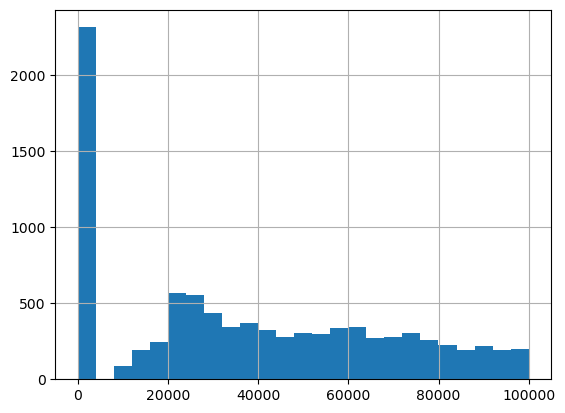

In [31]:
df["Income"].hist(bins=25)

<Axes: >

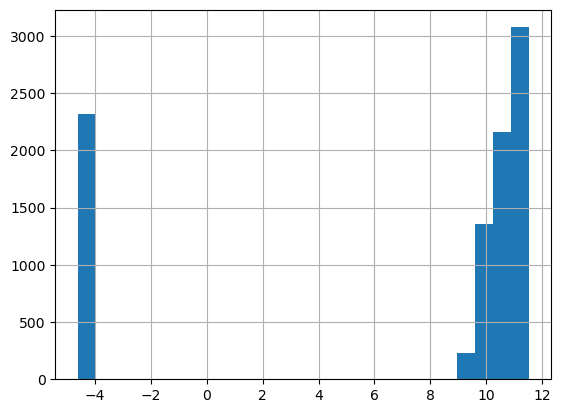

In [32]:
df["Income_Log"] = df["Income"].apply(lambda x: np.log(x+0.01))
df["Income_Log"].hist(bins=25)

In [33]:
logit = sm.Logit.from_formula(
    data=df,
    formula="Engaged ~ Income + EducationFactorized + Income : EducationFactorized"
).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.409427
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9130
Method:                           MLE   Df Model:                            3
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                0.003177
Time:                        16:24:20   Log-Likelihood:                -3739.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 2.701e-05
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -2.1009      0.077    -27.403      0.000      -2.251      -1.951
Income                      5.065e-06   1.54e-06      3.300      0.001    2.06e-06    8.07e-06
EducationFactorized            0.2158      0.045      4.753      0.000       0.127       0.305
Income:EducationFactorized -3.229e-06   9.22e-07     -3.502      0.000   -5.04e-06   -1.42e-06
==============================================================================================
"""

In [34]:
logit = sm.Logit.from_formula(
    data=df,
    formula="Engaged ~ Income_Log + EducationFactorized + Income_Log : EducationFactorized"
).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.405819
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9130
Method:                           MLE   Df Model:                            3
Date:                Tue, 26 Mar 2024   Pseudo R-squ.:                 0.01196
Time:                        16:24:21   Log-Likelihood:                -3706.8
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 2.476e-19
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -2.3139      0.082    -28.190      0.000      -2.475      -2.153
Income_Log                         0.0571      0.008      6.917      0.000       0.041       0.073
EducationFactorized                0.1673      0.050      3.375      0.001       0.070       0.264
Income_Log:EducationFactorized    -0.0119      0.005     -2.412      0.016      -0.022      -0.002
==================================================================================================
"""